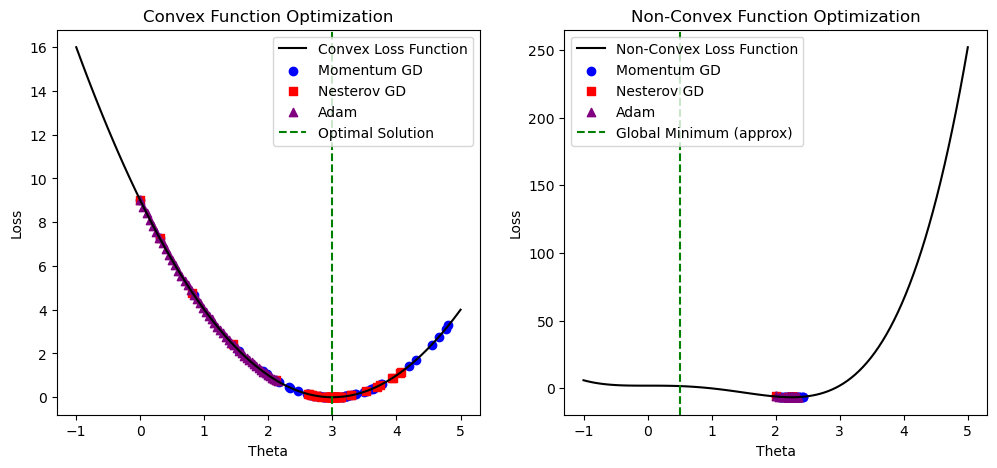

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Convex function: f(theta) = (theta - 3)^2
def convex_loss(theta):
    return (theta - 3) ** 2

def convex_gradient(theta):
    return 2 * (theta - 3)

# Non-convex function: f(theta) = theta^4 - 3*theta^3 + 2
def nonconvex_loss(theta):
    return theta**4 - 3 * theta**3 + 2

def nonconvex_gradient(theta):
    return 4 * theta**3 - 9 * theta**2

def momentum_gd(grad_func, theta_init=0, eta=0.05, beta=0.9, iterations=50):
    """Momentum-based Gradient Descent"""
    theta = theta_init
    velocity = 0
    theta_history = [theta]

    for _ in range(iterations):
        grad = grad_func(theta)
        velocity = beta * velocity - eta * grad
        theta += velocity
        theta_history.append(theta)

    return theta_history

def nesterov_gd(grad_func, theta_init=0, eta=0.05, beta=0.9, iterations=50):
    """Nesterov Accelerated Gradient Descent"""
    theta = theta_init
    velocity = 0
    theta_history = [theta]

    for _ in range(iterations):
        lookahead_theta = theta + beta * velocity
        grad = grad_func(lookahead_theta)
        velocity = beta * velocity - eta * grad
        theta += velocity
        theta_history.append(theta)

    return theta_history

def adam_optimizer(grad_func, theta_init=0, eta=0.05, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=50):
    """Adam Optimizer"""
    theta = theta_init
    m, v = 0, 0  # Initialize moment estimates
    theta_history = [theta]

    for t in range(1, iterations + 1):
        grad = grad_func(theta)
        m = beta1 * m + (1 - beta1) * grad  # Compute biased first moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)  # Compute biased second moment estimate

        m_hat = m / (1 - beta1 ** t)  # Correct bias in first moment
        v_hat = v / (1 - beta2 ** t)  # Correct bias in second moment

        theta -= eta * m_hat / (np.sqrt(v_hat) + epsilon)
        theta_history.append(theta)

    return theta_history

# Apply to convex function
theta_momentum_convex = momentum_gd(convex_gradient)
theta_nesterov_convex = nesterov_gd(convex_gradient)
theta_adam_convex = adam_optimizer(convex_gradient)

# Apply to non-convex function
theta_momentum_nonconvex = momentum_gd(nonconvex_gradient, theta_init=2)
theta_nesterov_nonconvex = nesterov_gd(nonconvex_gradient, theta_init=2)
theta_adam_nonconvex = adam_optimizer(nonconvex_gradient, theta_init=2)

# Visualization
x_vals = np.linspace(-1, 5, 100)
convex_vals = convex_loss(x_vals)
nonconvex_vals = nonconvex_loss(x_vals)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Convex Function Plot
axs[0].plot(x_vals, convex_vals, label="Convex Loss Function", color='black')
axs[0].scatter(theta_momentum_convex, convex_loss(np.array(theta_momentum_convex)), label="Momentum GD", marker='o', color='blue')
axs[0].scatter(theta_nesterov_convex, convex_loss(np.array(theta_nesterov_convex)), label="Nesterov GD", marker='s', color='red')
axs[0].scatter(theta_adam_convex, convex_loss(np.array(theta_adam_convex)), label="Adam", marker='^', color='purple')
axs[0].axvline(x=3, color='green', linestyle='dashed', label="Optimal Solution")
axs[0].set_title("Convex Function Optimization")
axs[0].set_xlabel("Theta")
axs[0].set_ylabel("Loss")
axs[0].legend()

# Non-Convex Function Plot
axs[1].plot(x_vals, nonconvex_vals, label="Non-Convex Loss Function", color='black')
axs[1].scatter(theta_momentum_nonconvex, nonconvex_loss(np.array(theta_momentum_nonconvex)), label="Momentum GD", marker='o', color='blue')
axs[1].scatter(theta_nesterov_nonconvex, nonconvex_loss(np.array(theta_nesterov_nonconvex)), label="Nesterov GD", marker='s', color='red')
axs[1].scatter(theta_adam_nonconvex, nonconvex_loss(np.array(theta_adam_nonconvex)), label="Adam", marker='^', color='purple')
axs[1].axvline(x=0.5, color='green', linestyle='dashed', label="Global Minimum (approx)")
axs[1].set_title("Non-Convex Function Optimization")
axs[1].set_xlabel("Theta")
axs[1].set_ylabel("Loss")
axs[1].legend()

plt.show()


1. #### The visualisations show that there are wide variations among the optimisers when dealing with
#### convex functions with a single global minimal and as such it is prudent to use the NAG whilst the momentum and Adam can be used
#### for non-convex functions for the minimal loss optimisation.